In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#total null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.shape

(891, 15)

In [6]:
df.dropna().shape

(182, 15)

# Imputation Missing Values

## 1.Mean Value Imputation

it works well when we have normally distributed data

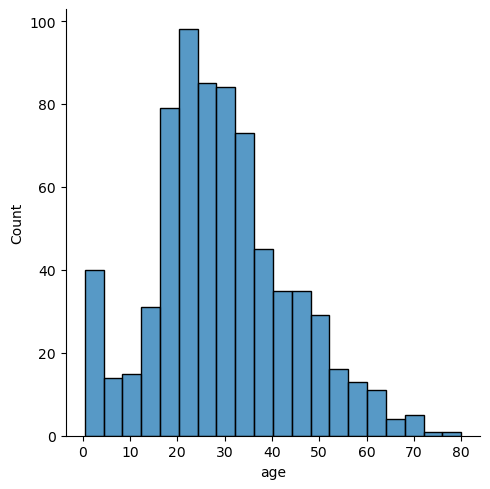

In [11]:
sns.displot(df['age'])

<AxesSubplot: xlabel='age', ylabel='Count'>

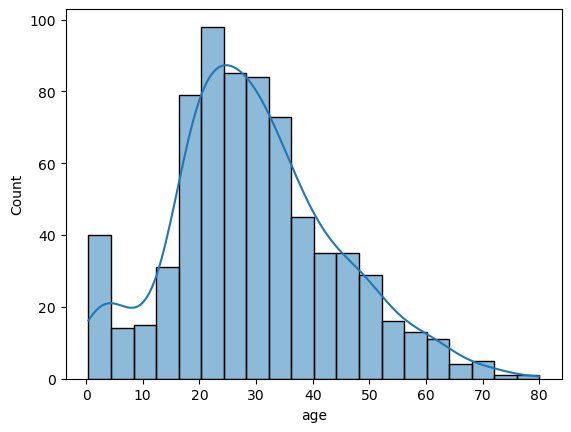

In [13]:
sns.histplot(df['age'],kde=True)

In [17]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [23]:
df['Age_mean'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age_mean, dtype: float64

<AxesSubplot: xlabel='Age_mean', ylabel='Count'>

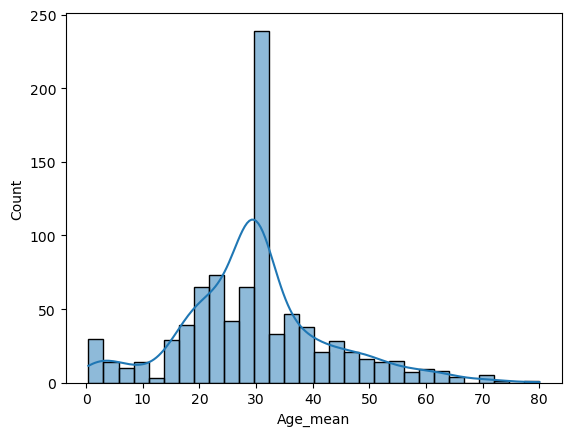

In [19]:
sns.histplot(df['Age_mean'],kde=True)

## 2.Median Value Imputation

if we have outliers in dataset

In [20]:
df['Age_median']=df['age'].fillna(df['age'].median())

In [22]:
df['Age_median'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age_median, dtype: float64

## 3.Mode Iputation

catagorical values

In [24]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [32]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [33]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [36]:
df['embarked_mode'].isnull().sum()

0

# Handling immbalanced dataset

In [9]:
import pandas as pd
import numpy as np

A random seed is used to ensure that results are reproducible. In other words, using this parameter makes sure that anyone who re-runs your code will get the exact same outputs.


In [4]:
np.random.seed(123)
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples * class_0_ratio)
n_class_1=n_samples - n_class_0

In [5]:
n_class_0,n_class_1

(900, 100)

## creating dataframes

In [6]:
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target': [0] * n_class_0
    })
class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target': [1] * n_class_1
    })

In [9]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [10]:
df.head()

,feature_1,target
0,0.551302,0
1,0.419589,0
2,1.815652,0
3,-0.252750,0
4,-0.292004,0


In [13]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

## upsampling

In [14]:
minority=df[df['target']==1]
majority=df[df['target']==0]

In [15]:
from sklearn.utils import resample

In [16]:
minority_upsampled=resample(minority,replace=True,
         n_samples=len(majority),
         random_state=42
        )

In [17]:
minority_upsampled.shape

(900, 2)

In [18]:
minority_upsampled.head()

,feature_1,target
951,1.843917,1
992,1.397425,1
914,2.998053,1
971,3.034197,1
960,1.550485,1


In [21]:
df_upsampled=pd.concat([majority,minority_upsampled])

In [22]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## down sampling

In [23]:
majority_downsampled=resample(majority,replace=False,
         n_samples=len(minority),
         random_state=42
        )

In [24]:
majority_downsampled.shape

(100, 2)

In [25]:
majority_downsampled.head()

,feature_1,target
70,1.720920,0
827,-0.464899,0
231,-0.969798,0
588,-0.704720,0
39,1.012868,0


In [26]:
df_downsampled=pd.concat([minority,majority_downsampled])

In [27]:
df_downsampled['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

# S M O T E

In [15]:
from sklearn.datasets import make_classification

In [16]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [17]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [18]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

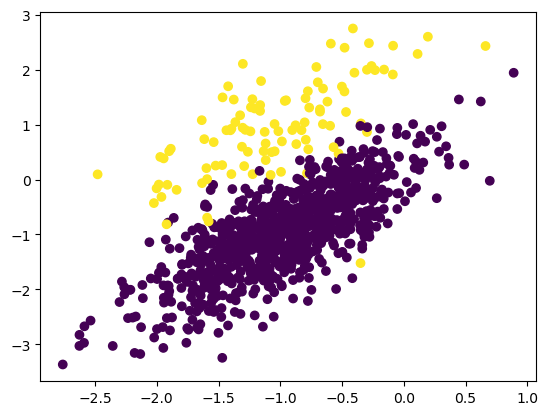

In [19]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [20]:
!pip install imblearn

In [21]:
from imblearn.over_sampling import SMOTE

In [23]:
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [24]:
x.shape

(1800, 2)

In [25]:
y.shape

(1800,)

In [26]:
len(y[y==1])

900

In [28]:
len(y[y==0])

900

In [27]:
len(x[x==1])

1800

In [31]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

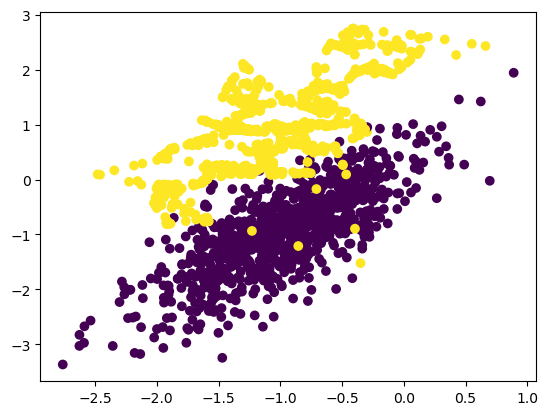

In [32]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])